# **7. General Pre-Trained Transformers**

## Load the data
---

In [4]:
# Load this library
import numpy as np
import pandas as pd


import math
import os
import re
from typing import Tuple

import torch
import torch.nn.functional as F
from torch import nn, Tensor

from torchtext import datasets

from tqdm import tqdm
import time

import matplotlib.pyplot as plt
import seaborn as sns

g = torch.Generator().manual_seed(42)

np.random.seed(42)

import gc

Load the data from given data path

In [5]:
news_data_path = '../data/artikel_katadata_medium.csv'

In [6]:
news_data = pd.read_csv(news_data_path).values.tolist()

In [7]:
news_data[0]

['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya. Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi. Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama. Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba. Alibaba mempunyai sepertiga saham di Ant Group. ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8). Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok. Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran. Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat. Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi. Regulator Tiongkok juga mengeluarkan serangk

In [8]:
sentences = []
for news in news_data :
  splitted_news = news[0].split('.')
  for splitted in splitted_news :
      sentences.append(splitted)

Yes, we have some duplicated data. Let's see the duplicated data.

## Create load function
---

Finally, we can create load data function

In [9]:
def load_news_data(data_path):
    """
    Function to load news data
        & removing duplicate data on news  data

    Parameters
    ----------
    data_path : str
        news  data path

    Returns
    -------
    news_data : pandas DataFrame
        Indonesian news data
    """
    # Load data
    news_data = pd.read_csv(news_data_path).values.tolist()

    # # extract into sentences level
    # sentences = []
    # for news in tqdm(news_data) :
    #   splitted_news = news[0].split('.')
    #   for splitted in splitted_news :
    #       sentences.append(splitted)


    return news_data


In [10]:
news_data = load_news_data(data_path = news_data_path)

In [11]:
news_data

[['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya. Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi. Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama. Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba. Alibaba mempunyai sepertiga saham di Ant Group. ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8). Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok. Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran. Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat. Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi. Regulator Tiongkok juga mengeluarkan serang

## Preprocess data
---

## Text Preprocessing


---

### Lowercase

### Tokenize Text Using Byte-Pair Encoding from Scratch

For now, we will use tokenizer based on english language, from spacy

### Create Processing function

In [12]:
def preprocess_tokens(text) :
    """
    Function to preprocess data

    Parameters :
    ----------
    data : pd.DataFrame
         dataframe contain text data
    text_col : str
          column name of text
    """
    # lowercase

    text = text.lower()
    # remove digits
    text = re.sub(r'\d', '', text)


    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\t', '', text)

    # extract token based on space / word level
    tokens = text.split(' ')

    updated_tokens = []
    not_allowed_tokens = ['']
    updated_tokens = [token for token in tokens if token not in not_allowed_tokens]



    return updated_tokens

In [13]:
processed_sentences = [preprocess_tokens(text) for news in news_data for text in news]
processed_sentences

[['anak',
  'usaha',
  'alibaba',
  'ant',
  'group',
  'mencatatkan',
  'penurunan',
  'laba',
  'pada',
  'kuartal',
  'yang',
  'berakhir',
  'maret',
  'dibandingkan',
  'kuartal',
  'sebelumnya',
  'ini',
  'terjadi',
  'di',
  'saat',
  'tiongkok',
  'mengeluarkan',
  'sejumlah',
  'aturan',
  'baru',
  'terkait',
  'perusahaan',
  'teknologi',
  'berdasarkan',
  'laporan',
  'keuangan',
  'perusahaan',
  'ant',
  'group',
  'mencatatkan',
  'laba',
  'us',
  'miliar',
  'atau',
  'rp',
  'triliun',
  'pada',
  'kuartal',
  'pertama',
  'raksasa',
  'teknologi',
  'finansial',
  'fintech',
  'ini',
  'menyumbang',
  'hampir',
  'us',
  'juta',
  'atau',
  'rp',
  'triliun',
  'untuk',
  'pendapatan',
  'alibaba',
  'alibaba',
  'mempunyai',
  'sepertiga',
  'saham',
  'di',
  'ant',
  'group',
  'berarti',
  'laba',
  'turun',
  'dari',
  'tiga',
  'bulan',
  'sebelumnya',
  'demikian',
  'dikutip',
  'dari',
  'bloomberg',
  'selasa',
  'analis',
  'menilai',
  'laba',
  'ant',


We are going to select which sentence we are going to use by thresholding minimum word, let say 3

## Collect Corpus

So how do we collect our training data ? First we decide context length we want, let say 30 words

In [14]:
example_sentence = processed_sentences[0][:30]
example_sentence

['anak',
 'usaha',
 'alibaba',
 'ant',
 'group',
 'mencatatkan',
 'penurunan',
 'laba',
 'pada',
 'kuartal',
 'yang',
 'berakhir',
 'maret',
 'dibandingkan',
 'kuartal',
 'sebelumnya',
 'ini',
 'terjadi',
 'di',
 'saat',
 'tiongkok',
 'mengeluarkan',
 'sejumlah',
 'aturan',
 'baru',
 'terkait',
 'perusahaan',
 'teknologi',
 'berdasarkan',
 'laporan']

The training data should look like

In [15]:
X = example_sentence[:-1]
y = example_sentence[1:]

for a,b in zip(X,y) :
  print(f'Input {a} --> {b}')

Input anak --> usaha
Input usaha --> alibaba
Input alibaba --> ant
Input ant --> group
Input group --> mencatatkan
Input mencatatkan --> penurunan
Input penurunan --> laba
Input laba --> pada
Input pada --> kuartal
Input kuartal --> yang
Input yang --> berakhir
Input berakhir --> maret
Input maret --> dibandingkan
Input dibandingkan --> kuartal
Input kuartal --> sebelumnya
Input sebelumnya --> ini
Input ini --> terjadi
Input terjadi --> di
Input di --> saat
Input saat --> tiongkok
Input tiongkok --> mengeluarkan
Input mengeluarkan --> sejumlah
Input sejumlah --> aturan
Input aturan --> baru
Input baru --> terkait
Input terkait --> perusahaan
Input perusahaan --> teknologi
Input teknologi --> berdasarkan
Input berdasarkan --> laporan


In [16]:
n_context = 20

In [17]:
def collect_training_data(news_data,n_context=20) :
  collected_training_data = []
  for news in news_data :
    # perform sliding window
    start = 0
    end=n_context+start
    # get maximum length
    n_loops = len(news) // n_context
    for i in range(n_loops) :
      if i+1 == n_loops :
        # check if it can fit into full
        end_location = start + n_context-1 if len(news[start:]) > n_context else len(news[start:])
        training_data = news[start:end_location]
        collected_training_data.append(training_data)
      else :
        training_data = news[start:end]
        start = end+1
        end = start + n_context-1
        collected_training_data.append(training_data)
  return collected_training_data


In [18]:
corpus = collect_training_data(processed_sentences,n_context=20)

In [19]:
len(corpus)

3913

Validate if we have 20 context length at all training samples

In [20]:
for c in corpus :
  if len(c) > 20 :
    print('There is ',len(c))

Okay we are good then

### Next Step : Adding Special Token

- Starting Token such as `<s>`
- End of Sentence Token such as `</s>`
- Padding Token such as `<pad>`

In [21]:
n_context = 20  # 2 from special token
def add_special_token(corpus,n_context,SOS='<s>',EOS='</s>',PAD='<pad>') :
    collected = []
    for text in corpus :
      text = f'{" ".join(text)}'.split(' ')

      if len(text) < n_context :
        padd_num = n_context - len(text)
        text = text + [PAD]*padd_num

        collected.append(text)
      else :
        collected.append(text)

    return collected

In [22]:
ready_corpus = add_special_token(corpus=corpus,n_context=n_context)


In [23]:
for c in ready_corpus :
  if len(c) > 22 :
    print(c)
    print(len(c))
    break

In [24]:
len(ready_corpus)

3913

### Mapping all token

We already collect all the sentences, back to language modelling.
We represent each word / token with vector, the vector from all vocabularies build up as a matrix

But how do we get a vector for a word, we cannot directly search using the word itself. Instead we use `index` or `position`. Hence we need to create mapping for our vocabulary.

```
word_to_idx = {"wordA" : 0 ,
               "wordB" : 1,
               ..
               "wordN" : N-1}
```

```
idx_to_word = { 0 :"wordA" ,
                1 : "wordB",
               ..
                N-1: "wordN"}
```

#### Collect vocabulary

In [25]:
len(ready_corpus)

3913

In [26]:
# collecting vocabulary
vocabs = []
for sentence in  ready_corpus :
    for vocab in sentence :
      vocabs.append(vocab)
vocabs = list(set(vocabs))

In [27]:
vocabs[:5]

['', 'siapkah', 'karl', 'himpunan', 'penumpang']

In [28]:
len(vocabs)

8835

In [29]:
word_to_idx = {word:idx for idx,word in enumerate(vocabs)}
idx_to_word = {idx : word for idx,word in enumerate(vocabs)}

## Prepare training Data

### Mapping text to index

In [30]:
def get_idx(word) :
  return word_to_idx[word]


def get_word(idx) :
  return idx_to_word[idx]

In [31]:
def collect_training_data(corpus,n_context,word_to_idx) :
    training_word_idx = np.zeros(shape=(len(corpus),n_context))
    for idx,sentence in enumerate(corpus) :
      result = np.array(list(map(get_idx,sentence)))
      training_word_idx[idx] = result
    training_word_idx = torch.from_numpy(training_word_idx).type(torch.LongTensor)
    return training_word_idx

In [32]:
training_idx = collect_training_data(corpus=ready_corpus,n_context=n_context,word_to_idx=word_to_idx)

### Split X and y

In [33]:
X = training_idx[:,:-1]
y = training_idx[:,1:]

In [34]:
X.shape

torch.Size([3913, 19])

In [35]:
X[0]

tensor([4388, 7801, 4116, 6172, 4428, 3370, 8495, 4283, 4123, 4512, 8697, 2306,
        5344, 6100, 4512, 1920, 1425, 5804, 4197])

In [36]:
y[0]

tensor([7801, 4116, 6172, 4428, 3370, 8495, 4283, 4123, 4512, 8697, 2306, 5344,
        6100, 4512, 1920, 1425, 5804, 4197, 2776])

### Split our data into 3 Sets

- Training
- Test
- Validation

In [37]:
idx_80 = int(0.8*len(X))
idx_90 = int(0.9*len(X))
X_train,y_train = X[:idx_80],y[:idx_80]
X_val,y_val = X[idx_80:idx_90],y[idx_80:idx_90]
X_test,y_test =  X[idx_90:],y[idx_90:]

In [38]:
print(f'''\t X_train shape : {X_train.shape} y_train shape :{y_train.shape}  \n
          X_val shape : {X_val.shape} y_val shape :{y_val.shape}  \n
          X_test shape : {X_test.shape} y_test shape :{y_test.shape}
          ''')

	 X_train shape : torch.Size([3130, 19]) y_train shape :torch.Size([3130, 19])  

          X_val shape : torch.Size([391, 19]) y_val shape :torch.Size([391, 19])  

          X_test shape : torch.Size([392, 19]) y_test shape :torch.Size([392, 19])
          


Let's create function to return minibatch of data from our dataset

In [39]:
generator = torch.Generator().manual_seed(42)
def get_batches(split,batch_size,device='cpu',g=generator) :
  options = {
      'train': (X_train,y_train),
      'val':   (X_val,y_val),
      'test' : (X_test,y_test)
  }
  X_split,y_split = options[split]
  ix = torch.randint(0, X_split.shape[0], (batch_size,), generator=g)
  X_batch = X_split[ix].to(device)
  y_batch = y_split[ix].to(device)
  return X_batch,y_batch

In [40]:
X_sample,y_sample = get_batches(split='train',batch_size=1)

In [41]:
X_sample.shape

torch.Size([1, 19])

In [42]:
y_sample.shape

torch.Size([1, 19])

## Implementing GPT-2 Paper

GPT-2 is Decoder Only Language Model, previously we already implemented the transformer for machine translation task, now, we implement both encoder and decoder, for now, it would be easier to implement GPT-2 Architecture

<img src="https://www.researchgate.net/publication/349521999/figure/fig1/AS:994338746146817@1614080239754/Decoder-Only-Architecture-used-by-GPT-2.ppm" height=500 width = 300>

### Positional Encoding

GPT2 Positional Encoding is simply like word embedding, but instead of each word, each position has embedding

### Attention Head

In Transformer decoder block we also perform intra (decoder-encoder attention) hence q,k,v input vector should be specified , now since it only perform masked self attention, we can use directly x

In [43]:

class AttentionHead(nn.Module):
    def __init__(self, n_dim,n_dim_head,dropout_p):
        super().__init__()
        self.linear_key = nn.Linear(n_dim, n_dim_head, bias=False)
        self.linear_query = nn.Linear(n_dim, n_dim_head, bias=False)
        self.linear_value = nn.Linear(n_dim, n_dim_head, bias=False)
        self.attention_dropout = nn.Dropout(dropout_p)
        self.double()

    def forward(self,x,mask=None):
        B,T,C = x.shape
        Q = self.linear_query(x) # (B,T,C)
        K = self.linear_key(x)   # (B,T,C)

        # perform scaled dot product attenttion
        attention_weight = Q @ K.transpose(-2,-1) * C**-0.5

        # perform masking
        if mask is not None :
          attention_weight = attention_weight.masked_fill(mask==0,float('-inf')) # (B, T, T)

        attention_score = F.softmax(attention_weight, dim=-1) # (B, T, T)
        # perform the weighted aggregation of the values
        V = self.linear_value(x) # (B,T,C)
        out = self.attention_dropout(attention_score) @ V # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

### Calculating Attention

In [44]:
# try calculate attention

# create word embedding
n_vocab = len(vocabs)
n_dim = 10
n_context = 20+2
device='cpu'
padding_idx =  word_to_idx['<pad>']
word_embedding = nn.Embedding(num_embeddings=n_vocab,embedding_dim = n_dim)

In [45]:
n_vocab

8835

In [46]:
X_sample.shape

torch.Size([1, 19])

In [47]:
def make_attention_mask(X,padding_idx,device):

    #X = = [B,T]
    B,T = X.shape

    padding_mask = (X != padding_idx).unsqueeze(1).type(torch.LongTensor)
    padding_mask = padding_mask.to(device)
    #padding_mask = [B, 1, 1, T]

    # future word mask
    future_mask = torch.tril(torch.ones((T, T))).bool()
    future_mask = future_mask.to(device)
    #trg_sub_mask = [trg len, trg len]

    mask = future_mask & padding_mask
    mask = mask.to(device)
    #mask = [B 1, T, T]

    return mask

In [48]:
padding_idx

5636

In [49]:
X_sample

tensor([[5096, 4941, 2562, 2793, 3817, 2776, 1425, 1520, 3640, 4197, 5290, 5746,
         2534, 4499, 2919, 3817, 1792, 1730, 4197]])

In [50]:
mask = make_attention_mask(X=X_sample,padding_idx=padding_idx,device=device)
mask

tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
head = AttentionHead(n_dim=n_dim,n_dim_head=n_dim,dropout_p=0)

In [52]:
word_embedding(X_sample).shape

torch.Size([1, 19, 10])

In [53]:
# extract embedding first

input_ = word_embedding(X_sample).type(torch.double)
input_.shape

torch.Size([1, 19, 10])

In [54]:
head(input_)

tensor([[[-1.2418e-01, -7.0220e-02, -5.2864e-02,  3.4235e-02, -5.2598e-02,
          -1.3907e-02,  8.1425e-02,  9.3464e-02, -5.8215e-02,  1.0673e-01],
         [ 6.0557e-02,  1.1497e-01, -1.0617e-01, -6.5619e-02, -6.0452e-02,
           7.4958e-03, -1.7888e-02,  9.7646e-02, -3.3863e-02, -1.7932e-02],
         [-4.1617e-02,  2.9532e-02, -4.3640e-02, -1.0865e-02, -6.4557e-02,
          -2.2214e-03,  1.3915e-02,  7.6877e-02, -4.8978e-02,  9.5492e-03],
         [-6.3432e-02,  1.1725e-02, -6.3392e-02,  3.2272e-02, -2.9242e-02,
          -4.2400e-02,  4.4442e-02,  9.4372e-02,  1.6212e-02,  1.4628e-01],
         [ 1.3125e-02,  8.2284e-02, -2.3979e-02, -3.1931e-02, -6.8253e-02,
          -9.3326e-03, -2.3265e-02,  7.2053e-02, -3.6985e-02, -4.2087e-02],
         [-9.6070e-02, -3.2081e-02, -6.8094e-02,  1.8281e-02, -4.4136e-02,
          -3.8264e-03,  6.8920e-02,  8.7863e-02, -2.5413e-02,  1.2432e-01],
         [ 1.5189e-03,  1.7085e-01, -1.5237e-01, -3.4981e-03, -1.7875e-01,
           2.5506e-

That is our attention mask, since there is no padding

### MultiHead Attention

In [55]:
class MultiHeadAttention(nn.Module):

    def __init__(self, n_dim,num_heads,dropout_p):
        super().__init__()
        self.num_heads = num_heads
        n_dim_head = n_dim // num_heads
        # stack multiple  heads
        self.heads = nn.ModuleList([AttentionHead(n_dim,n_dim_head,dropout_p) for _ in range(num_heads) ])
        self.projection_dropout = nn.Dropout(dropout_p)

        self.proj = nn.Linear(n_dim, n_dim)
        self.double()

    def forward(self, x,mask=None):
        out = torch.cat([head(x=x, mask=mask) for head in self.heads], dim=-1)
        out = self.projection_dropout(self.proj(out))

        return out

In [56]:
multihead_attention = MultiHeadAttention(n_dim=n_dim,num_heads=2,dropout_p=0)

In [57]:
multihead_attention(input_)

tensor([[[-0.1801,  0.0558,  0.2346, -0.1350,  0.0517, -0.2924, -0.3338,
           0.3248,  0.0112, -0.1617],
         [-0.1304,  0.1468,  0.2779, -0.2105,  0.0651, -0.2402, -0.3847,
           0.2744,  0.0157, -0.1778],
         [-0.1919,  0.1509,  0.2493, -0.1261,  0.0327, -0.2839, -0.3084,
           0.2758,  0.0505, -0.1894],
         [-0.1151,  0.2853,  0.2717, -0.1485,  0.0015, -0.2905, -0.2698,
           0.1544,  0.1352, -0.3123],
         [-0.1502,  0.0716,  0.2433, -0.1584,  0.0650, -0.2797, -0.3350,
           0.3132,  0.0173, -0.1605],
         [-0.1393,  0.0697,  0.2487, -0.1804,  0.0747, -0.2629, -0.3696,
           0.3128,  0.0048, -0.1547],
         [-0.1653,  0.0280,  0.2439, -0.1812,  0.0686, -0.2772, -0.3851,
           0.3511, -0.0243, -0.1210],
         [-0.1224,  0.0931,  0.2318, -0.1597,  0.0501, -0.2727, -0.3445,
           0.2732,  0.0423, -0.1909],
         [-0.1568,  0.0952,  0.2818, -0.2013,  0.0576, -0.2716, -0.3598,
           0.2922, -0.0196, -0.2180],
 

### Decoder Blocks



There is slight difference version of activation function in GPT-2 Decoder Block Activation in Feed Forward, it uses [GELU Activation Function ](https://arxiv.org/abs/1606.08415)


$\text{GELU}(x) = 0.5x(1+Tanh(\sqrt{2/ \pi} (x+0.044715∗x^3)$

In [58]:
class GeLUAct(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

In [59]:
class DecoderBlock(nn.Module) :
    def __init__(self,n_dim,num_heads,dropout_p) :
      super().__init__()
      # add multihead(masked self attention) attention
      self.multihead_attention = MultiHeadAttention(n_dim,num_heads,dropout_p)
      # 1st layer norm after multihead attention
      self.ln_1 = nn.LayerNorm(n_dim)

      # in transformer paper --> the first multilayer perceptrion make the dimension 4*n_dim
      # arrangment , feed_forward1 --> layernorm --> GeLU --> feed_forward2
      self.feed_forward1 = nn.Linear(n_dim,4*n_dim)
      self.feed_forward2 = nn.Linear(4*n_dim,n_dim)
      self.gelu = GeLUAct()


      self.ln_2 = nn.LayerNorm(4*n_dim)
      self.double()

    def forward(self,x,mask=None) :
      # perform multihead attention + layer norm
      x = x + self.ln_1(self.multihead_attention(x=x, mask=mask))

      # feed to feed forward layer + residual connection + layer norm
      x = x + self.feed_forward2(self.gelu(self.ln_2(self.feed_forward1(x))))

      return x



In [60]:
single_decoder_block = DecoderBlock(n_dim=n_dim,num_heads=2,dropout_p=0)

In [61]:
single_decoder_block(input_)

tensor([[[ 3.8237,  0.2162, -1.6906, -1.2336,  0.1762,  1.4169, -0.9726,
           1.1879, -0.6350,  0.0226],
         [ 1.1562,  1.3412,  1.0728, -3.1190,  0.2883, -0.3386, -1.4505,
           2.4259, -1.0027, -1.6655],
         [ 1.7905,  1.3483, -0.0286, -1.4140,  0.9796,  2.2974, -0.7723,
           2.6163, -0.7494,  0.3750],
         [-0.3107,  0.4792,  0.6925, -2.4035,  0.1157,  0.6744, -2.6896,
           1.1722, -2.0321, -0.8914],
         [ 2.0740, -0.5038, -0.9294, -0.1641, -1.2005,  0.1866, -1.5873,
           1.4684,  0.6564,  0.2556],
         [ 2.1302, -0.7193, -0.9282, -1.6491, -0.7623,  0.0591, -1.7087,
           0.9757,  0.7093, -1.5038],
         [ 1.0132,  1.4763, -0.6616, -2.9672,  0.4365, -0.1578, -1.1238,
           0.5002,  0.3943, -0.4115],
         [ 2.9553,  0.3069, -0.0801, -2.6287, -0.0423,  0.7075, -3.0549,
           2.1893, -0.5079, -0.4338],
         [ 3.6171, -0.2796, -1.7261,  0.2321,  1.0723, -1.5532, -2.5928,
           1.3487, -1.7519, -1.2375],
 

### Decoder

In [62]:
class Decoder(nn.Module) :
  def __init__(self,vocab_num,
               n_dim, num_heads,dropout_p,
               n_block,context_length,device) :
      super().__init__()
      self.device = device
      # create word embedding
      self.word_embedding = nn.Embedding(vocab_num,
                                            n_dim)

      # create positional encoding
      self.positional_encoding = nn.Embedding(context_length,
                                            n_dim)
      # encoder blocks
      self.decoder = nn.ModuleList([DecoderBlock(n_dim,num_heads,dropout_p) for _ in range(n_block)])


      self.double()

  def forward(self,x,mask=None) :
    B,T = x.shape
    # create position encoding
    pos = torch.arange(0, T, dtype=torch.long, device=self.device).unsqueeze(0)

    # x is our input should have size --> [B,T]
    x = self.word_embedding(x) + self.positional_encoding(pos)

    for dec in self.decoder :
      x = dec(x=x,mask=mask)

    return x


### GPT Class

In [63]:
class GPT(nn.Module) :
    def __init__(self,vocab_num,n_dim,
                 num_heads,n_block,context_length,
                 dropout_p,
                 padding_idx,
                 device
                 ) :
        super().__init__()
        self.device = device
        self.padding_idx = padding_idx

        self.decoder = Decoder(vocab_num=vocab_num,
               n_dim=n_dim, num_heads=num_heads,dropout_p=dropout_p,
               n_block=n_block,context_length=context_length,device=device)
        self.final_projection = nn.Linear(n_dim,vocab_num)


        self.double()

    def make_decoder_mask(self, input):

        #y = = [B,T]
        B,T = input.shape

        padding_mask = (input != self.padding_idx).unsqueeze(1).type(torch.LongTensor)
        padding_mask = padding_mask.to(self.device)
        #padding_mask = [B, 1, 1, T]

        # future word mask
        future_mask = torch.tril(torch.ones((T, T))).bool()
        future_mask = future_mask.to(self.device)
        #trg_sub_mask = [trg len, trg len]

        mask = future_mask & padding_mask
        mask = mask.to(self.device)
        #mask = [B 1, T, T]

        return mask


    def forward(self,X) :
       decoder_mask = self.make_decoder_mask(X)
       decoder_out = self.decoder(X,mask=decoder_mask)

       # project ith linear
       logit = self.final_projection(decoder_out)

       return logit

### Let's try to perform feedforward + calculate loss

In [64]:
config={"vocab_num": len(vocabs),
        "n_dim":10,
        "num_heads":2,
        "n_block":1,
        "context_length":21,
        "dropout_p":0.1,
        "padding_idx": word_to_idx['<pad>'],
        "device" : "cuda" if torch.cuda.is_available() else "cpu"}

In [65]:
config

{'vocab_num': 8835,
 'n_dim': 10,
 'num_heads': 2,
 'n_block': 1,
 'context_length': 21,
 'dropout_p': 0.1,
 'padding_idx': 5636,
 'device': 'cpu'}

In [66]:
model_gpt = GPT(**config).to(config['device'])



In [67]:
# get training
X_sample,y_sample= get_batches(split='train',batch_size=1,device=config['device'])
# get logit
logit = model_gpt(X_sample)

# calculate loss
B,T,VOCAB = logit.shape
logit_ = logit.reshape(shape=(B*T,VOCAB))
y_sample = y_sample.reshape(shape=(B*T,))

F.cross_entropy(input=logit_,target=y_sample)


tensor(9.8618, dtype=torch.float64, grad_fn=<NllLossBackward0>)

Check initial loss
$-log(\cfrac{1}{8836})$

In [68]:
-np.log(1/config['vocab_num'])

9.086476384753796

Our loss was bit too higher, now let's experiment more

## BabySitting Learning Process


After having a deep dive about the arhitecture, now its time to create training pipeline


#### Checking Initial Loss

For the initialization we can refer to https://github.com/karpathy/minGPT/blob/master/mingpt/model.py

In [69]:
def _init_weights(module):
    if isinstance(module, nn.Linear):
        torch.nn.init.normal_(module.weight, mean=0.0, std=0.002)
        if module.bias is not None:
            torch.nn.init.zeros_(module.bias)
    elif isinstance(module, nn.Embedding):
        torch.nn.init.normal_(module.weight, mean=0.0, std=0.002)
    elif isinstance(module, nn.LayerNorm):
        torch.nn.init.zeros_(module.bias)
        torch.nn.init.ones_(module.weight)

In [70]:
BATCH_SIZE = 32
config={"vocab_num": len(vocabs),
        "n_dim":10,
        "num_heads":1,
        "n_block":1,
        "context_length":21,
        "dropout_p":0,
        "padding_idx": word_to_idx['<pad>'],
        "device" : "cpu" if torch.cuda.is_available() else "cpu"}

model = GPT(**config).to(device)
#model.apply(_init_weights)
# check model parameter
print('#parameters :', sum([p.numel() for p in model.parameters()]))

for p in model.parameters() :
  p.require_grad = True

#parameters : 187105


In [71]:
optimizer = torch.optim.Adam(model.parameters())


/home/ubuntu/learning/natural-language-processing/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [72]:
losses = []
max_iter = 5_000
for iter in range(max_iter):
    t1 = time.time()

    # get training
    X_sample,y_sample= get_batches(split='train',batch_size=1,device=config['device'])
    # get logit
    logit = model(X_sample)

    # calculate loss
    B,T,VOCAB = logit.shape
    logit_ = logit.reshape(shape=(B*T,VOCAB))
    y_sample = y_sample.reshape(shape=(B*T,))

    loss = F.cross_entropy(input=logit_,target=y_sample)


    # Backward pass
    for p in model.parameters():
        p.grad = None

    loss.backward()

    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")
    break


Step       0/   5000 | Loss 9.5411 | Step time 33.67 ms


Ideal Loss at the beginning should be :  $-log(\cfrac{1}{\text{vocab-target}})$

In [73]:
-np.log(1/config['vocab_num'])

9.086476384753796

Our Loss bit bit higher

We want to evaluate how good the model prediction in other set, such as validation set, hence we create evaluate loss function

In [74]:
@torch.no_grad()
def evaluate_loss(split,model,device,padding_idx=config['padding_idx']):
    # Get the data
    X, y = {
        'train': (X_train, y_train),
        'valid': (X_val, y_val),
        'test': (X_test, y_test)
    }[split]

    model.eval()
    X = X.to(device)
    y = y.to(device)



    logit = model(X)

    B,T,VOCAB = logit.shape

    logit_ = logit.reshape(shape=(B*T,VOCAB))
    y_ = y.reshape(shape=(B*T,))
    loss = F.cross_entropy(logit_, y_,ignore_index=padding_idx)

    return loss

#### Overfit on Small Batch

to check model capabilities, if the model learn it can overfit small amount of training sample

In [75]:
BATCH_SIZE = 32
config={"vocab_num": len(vocabs),
        "n_dim":10,
        "num_heads":2,
        "n_block":1,
        "context_length":21,
        "dropout_p":0.1,
        "padding_idx": word_to_idx['<pad>'],
        "device" : "cuda" if torch.cuda.is_available() else "cpu"}

model = GPT(**config).to(config['device'])

# check model parameter
print('#parameters :', sum([p.numel() for p in model.parameters()]))

for p in model.parameters() :
  p.require_grad = True

#parameters : 187105


In [76]:
optimizer = torch.optim.Adam(model.parameters())


In [77]:
losses = []
max_iter = 1600
X_sample,y_sample= get_batches(split='train',batch_size=10,device=config['device'])
for iter in range(max_iter):
    t1 = time.time()

    # get training

    # get logit
    logit = model(X_sample)

    # calculate loss
    B,T,VOCAB = logit.shape
    logit_ = logit.reshape(shape=(B*T,VOCAB))
    y_sample = y_sample.reshape(shape=(B*T,))

    loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=config['padding_idx'])


    # Backward pass
    for p in model.parameters():
        p.grad = None

    loss.backward()

    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")



Step       0/   1600 | Loss 9.5379 | Step time 47.75 ms


Step     100/   1600 | Loss 5.3381 | Step time 16.24 ms
Step     200/   1600 | Loss 2.4950 | Step time 23.19 ms
Step     300/   1600 | Loss 1.0205 | Step time 21.10 ms
Step     400/   1600 | Loss 0.4589 | Step time 23.47 ms
Step     500/   1600 | Loss 0.1864 | Step time 21.13 ms
Step     600/   1600 | Loss 0.1147 | Step time 21.36 ms
Step     700/   1600 | Loss 0.1264 | Step time 24.77 ms
Step     800/   1600 | Loss 0.0775 | Step time 17.84 ms
Step     900/   1600 | Loss 0.0257 | Step time 25.50 ms
Step    1000/   1600 | Loss 0.0267 | Step time 21.45 ms
Step    1100/   1600 | Loss 0.0247 | Step time 19.67 ms
Step    1200/   1600 | Loss 0.0191 | Step time 17.69 ms
Step    1300/   1600 | Loss 0.0189 | Step time 23.06 ms
Step    1400/   1600 | Loss 0.0086 | Step time 27.93 ms
Step    1500/   1600 | Loss 0.0079 | Step time 23.42 ms


We see that our loss can reach minimum , which is near zero, okay we are good then!

### Full Model Training

In [78]:
# We create the training function
def train(model,
          batch_size,
          max_iter,
          optimizer,device,
          logging_interim = 100,
          scheduler = None
          ):
    # Initialize
    losses = []
    losses_val = []

    best_valid_loss = float('inf')
    # Iterate
    for iter in range(max_iter):
        t1 = time.time()

        # get training
        X_sample,y_sample= get_batches(split='train',batch_size=32,device=config['device'])

        # get logit
        model.train()
        logit = model(X_sample)

        # calculate loss
        B,T,VOCAB = logit.shape
        logit_ = logit.reshape(shape=(B*T,VOCAB))
        y_sample = y_sample.reshape(shape=(B*T,))

        loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=config['padding_idx'])

        # Backward pass
        for p in model.parameters():
            p.grad = None

        loss.backward()
        # if clip is not None :
        #   torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        # calculate loss
        #loss_train = evaluate_loss(split='train',model=model,device=config['device'])
        loss_val = evaluate_loss(split='valid',model=model,device=config['device'])

        # Append the loss
        losses.append(loss.item())
        losses_val.append(loss_val.item())

        # Update the parameters
        optimizer.step()
        if scheduler is not None :
            scheduler.step()

        # Append the loss
        elapsed = time.time() - t1
        if max_iter == 1:
            print(f"Step {iter:7d}/{max_iter:7d} "
                f"| Loss {loss.item():.4f} "
                f"| Step time {elapsed*1000:.2f} ms")

        elif iter % logging_interim == 0:
          print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss mini batch {loss.item():.4f} "
              f"| Loss valid {loss_val.item():.4f} "
              f"| Learning Rate {optimizer.param_groups[0]['lr']} "
              f"| Step time {elapsed*1000:.2f} ms")




        # if validation loss goes down --> save model
        if loss_val.item() < best_valid_loss :
            best_valid_loss = loss_val.item()
            torch.save({
              'iter': iter,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'val_loss': loss_val,
              # 'train_loss': loss_train,
              }, 'model_check/best_model.pt')

    return losses,losses_val


In [79]:
X.shape

torch.Size([3913, 19])

In [80]:
y.shape

torch.Size([3913, 19])

In [81]:
BATCH_SIZE = 32
config={"vocab_num": len(vocabs),
        "n_dim":10,
        "num_heads":1,
        "n_block":2,
        "context_length":19,
        "dropout_p":0,
        "padding_idx": word_to_idx['<pad>'],
        "device" : "cuda" if torch.cuda.is_available() else "cpu"}

model_retrain = GPT(**config).to(config['device'])
optimizer = torch.optim.Adam(model_retrain.parameters(),lr= 5e-3,
                             betas=(0.7,0.9),
                             weight_decay=0.001,
                             )
model_retrain.apply(_init_weights)
# check model parameter
print('#parameters :', sum([p.numel() for p in model_retrain.parameters()]))

for p in model_retrain.parameters() :
  p.require_grad = True


#parameters : 188445


In [82]:
!mkdir model_check

mkdir: cannot create directory ‘model_check’: File exists


In [83]:
losses,losses_val = train(model=model_retrain,
          batch_size=128,
          max_iter=1000,scheduler=None,
          optimizer=optimizer,device=config['device'],logging_interim=25)

Step       0/   1000 | Loss mini batch 9.0865 | Loss valid 9.0865 | Learning Rate 0.005 | Step time 615.52 ms
Step      25/   1000 | Loss mini batch 7.7029 | Loss valid 7.7054 | Learning Rate 0.005 | Step time 573.74 ms
Step      50/   1000 | Loss mini batch 7.4909 | Loss valid 7.6981 | Learning Rate 0.005 | Step time 566.67 ms
Step      75/   1000 | Loss mini batch 7.2858 | Loss valid 7.6667 | Learning Rate 0.005 | Step time 572.92 ms
Step     100/   1000 | Loss mini batch 7.4781 | Loss valid 7.6466 | Learning Rate 0.005 | Step time 564.42 ms
Step     125/   1000 | Loss mini batch 7.3848 | Loss valid 7.6250 | Learning Rate 0.005 | Step time 565.58 ms
Step     150/   1000 | Loss mini batch 7.6796 | Loss valid 7.5957 | Learning Rate 0.005 | Step time 703.35 ms
Step     175/   1000 | Loss mini batch 7.1715 | Loss valid 7.5498 | Learning Rate 0.005 | Step time 568.98 ms
Step     200/   1000 | Loss mini batch 7.2681 | Loss valid 7.5380 | Learning Rate 0.005 | Step time 565.88 ms
Step     2

Text(0.5, 1.0, 'Loss after 1000 Iteration')

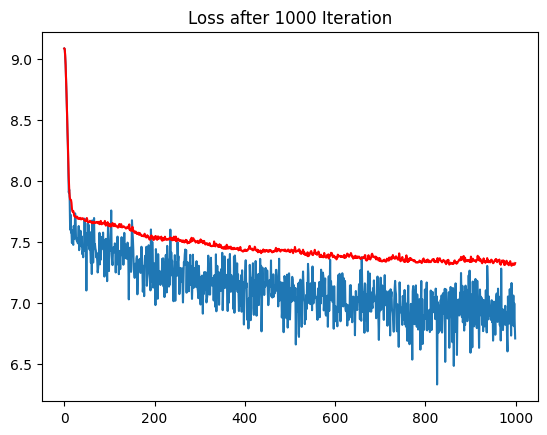

In [84]:
plt.plot([x for x in range(len(losses))],losses)
# plt.plot([x for x in range(len(losses))],losses_train,color='g')
plt.plot([x for x in range(len(losses))],losses_val,color='r')
plt.title(f'Loss after {len(losses)} Iteration')

#### Load Best Checkpoint model

In [86]:
PATH = 'model_check/best_model.pt'
checkpoint = torch.load(PATH)
model_retrain.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [87]:
evaluate_loss(split='test',model=model_retrain,device=config['device'])

tensor(7.4176, dtype=torch.float64)

In [88]:
evaluate_loss(split='valid',model=model_retrain,device=config['device'])

tensor(7.3142, dtype=torch.float64)

In [89]:
evaluate_loss(split='train',model=model_retrain,device=config['device'])

tensor(6.8874, dtype=torch.float64)

In [90]:
def show_grads(model, tol=1e-2):
    return [(name, 100.0 * float(torch.sum(torch.abs(param) <= tol)) / float(param.nelement())) for name, param in model.named_parameters() if param.requires_grad]

show_grads(model_retrain)

[('decoder.word_embedding.weight', 64.26825127334465),
 ('decoder.positional_encoding.weight', 42.10526315789474),
 ('decoder.decoder.0.multihead_attention.heads.0.linear_key.weight', 100.0),
 ('decoder.decoder.0.multihead_attention.heads.0.linear_query.weight', 100.0),
 ('decoder.decoder.0.multihead_attention.heads.0.linear_value.weight', 8.0),
 ('decoder.decoder.0.multihead_attention.proj.weight', 7.0),
 ('decoder.decoder.0.multihead_attention.proj.bias', 30.0),
 ('decoder.decoder.0.ln_1.weight', 10.0),
 ('decoder.decoder.0.ln_1.bias', 0.0),
 ('decoder.decoder.0.feed_forward1.weight', 6.75),
 ('decoder.decoder.0.feed_forward1.bias', 32.5),
 ('decoder.decoder.0.feed_forward2.weight', 58.75),
 ('decoder.decoder.0.feed_forward2.bias', 10.0),
 ('decoder.decoder.0.ln_2.weight', 57.5),
 ('decoder.decoder.0.ln_2.bias', 57.5),
 ('decoder.decoder.1.multihead_attention.heads.0.linear_key.weight', 59.0),
 ('decoder.decoder.1.multihead_attention.heads.0.linear_query.weight', 54.0),
 ('decoder.de

## Generating Sentences

### Decoding Strategies

In [92]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

/home/ubuntu/learning/natural-language-processing/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Greedy Approach

In [93]:
@torch.no_grad()
def generate_greedy(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logit  = model(cropped_idx).logits
        logits = logit[:,-1,:]
        # softmax
        probs = torch.nn.functional.softmax(logits)
        idx_next = torch.topk(probs,k=1).indices

        # cat
        input = torch.cat([input,idx_next],dim=-1)


           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()

    return input

In [94]:
example_text = 'When European Union Established ?'
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_greedy(model=model,input=input_ids,max_new_tokens=20,context_length=200)
print(tokenizer.decode(outs.view(-1)))

/tmp/ipykernel_3766/856298431.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


When European Union Established ?

The European Union has established a new European Economic Area (EEA) in the European Union


### Simple Sampling

In [95]:
@torch.no_grad()
def generate_sampling(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logit  = model(cropped_idx).logits
        logits = logit[:,-1,:]
        # softmax
        probs = torch.nn.functional.softmax(logits)
        idx_next = torch.multinomial(probs,num_samples=1)

        # cat
        input = torch.cat([input,idx_next],dim=-1)


           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

In [96]:
example_text = 'When European Union Established ?'
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_sampling(model=model,input=input_ids,max_new_tokens=20,context_length=200)

print(tokenizer.decode(outs.view(-1)))

/tmp/ipykernel_3766/2249377418.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


When European Union Established ?.

European Union's 57-year history, from 1958 onward, has created a majority of


### Top K Sampling

In [97]:
# generate top k sampling
import gc
@torch.no_grad()
def generate_topk_sampling(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logit  = model(cropped_idx).logits
        logits = logit[:,-1,:] / temperature
        top_indices = torch.topk(logits,k=5).indices.view(-1)

        logits = logits[:,top_indices]
        probs = torch.nn.functional.softmax(logits,dim=-1)
        idx_next = torch.multinomial(probs, num_samples=1)

        # cat
        input = torch.cat([input,idx_next],dim=-1)


           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()

    return input

In [98]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_topk_sampling(model=model,input=input_ids,max_new_tokens=20,context_length=200,temperature=1)
print(tokenizer.decode(outs.view(-1)))

When are !!!!!!!!!!!!!!!!!!!!


In [99]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_topk_sampling(model=model,input=input_ids,max_new_tokens=20,context_length=200,temperature=2)
print(tokenizer.decode(outs.view(-1)))

When are !##!""!!"#!"!!!"!"!"


In [100]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_sampling(model=model,input=input_ids,max_new_tokens=20,temperature=20,context_length=200)

print(tokenizer.decode(outs.view(-1)))

/tmp/ipykernel_3766/2249377418.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


When are ____ trending?


Dates : Yesterday, December 29

: Yesterday, December 29 For


### Temperature Scaling

In [101]:
@torch.no_grad()
def generate_sampling(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logit  = model(cropped_idx).logits
        # scale the tempterature
        logits = logit[:,-1,:] / temperature
        # softmax
        probs = torch.nn.functional.softmax(logits)
        idx_next = torch.multinomial(probs,num_samples=1)

        # cat
        input = torch.cat([input,idx_next],dim=-1)


           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()

    return input

In [102]:
example_text = 'When European Union Established ?'
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_sampling(model=model,input=input_ids,max_new_tokens=20,temperature=1,context_length=200)

print(tokenizer.decode(outs.view(-1)))

/tmp/ipykernel_3766/1482915249.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


When European Union Established ? " Based upon overview and the current arguments not supported by the Ungisteguist struggles, consider the


In [103]:
example_text = 'When European Union Established ?'
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_sampling(model=model,input=input_ids,max_new_tokens=20,temperature=2,context_length=200)

print(tokenizer.decode(outs.view(-1)))

/tmp/ipykernel_3766/1482915249.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


When European Union Established ? About ilar WouldOkay MeşhistoryPal565? deep Ponyhttps://Alithinkouts affirmative agency


### Nucleus Sampling

In [104]:
@torch.no_grad()
def generate_nucleus_sampling(model, input,p,
              temperature,
             max_new_tokens,
             context_length,
             device='cpu'):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logit  = model(cropped_idx).logits
        logits = logit[:,-1,:] /temperature
        # sort logits first
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)

        # calculate probabilites
        probs = torch.nn.functional.softmax(sorted_logits , dim=-1)
        # make running cummulative
        cumulative_probs = torch.cumsum(probs, dim=-1)
        # create mask
        mask_index = cumulative_probs < p
        # set masking fasl as -inf so that the probs == 0
        sorted_logits =sorted_logits.masked_fill(mask_index==False,float("-inf"))

        sorted_probs = torch.nn.functional.softmax(sorted_logits , dim=-1)
        idx_next = torch.multinomial(sorted_probs, num_samples=1)

        # cat
        input = torch.cat([input,idx_next],dim=-1)

        # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

In [105]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_nucleus_sampling(model=model,input=input_ids,max_new_tokens=20,p=1,context_length=200,temperature=1)
print(tokenizer.decode(outs.view(-1)))

When are -u!%hen">s's recognizeG.!idesostiv but! hea


In [106]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_nucleus_sampling(model=model,input=input_ids,max_new_tokens=20,p=0.8,context_length=200,temperature=1)
print(tokenizer.decode(outs.view(-1)))

When are . getU!"#�'I!~<"ed%c�&L�


In [107]:
example_text = 'When are '
input_ids = tokenizer.encode(example_text, return_tensors='pt')
outs = generate_nucleus_sampling(model=model,input=input_ids,max_new_tokens=20,p=0.8,context_length=200,temperature=20)
print(tokenizer.decode(outs.view(-1)))

When are reprene traitsINGS Classicuatedrivers Singh moistureitary Ach missed anybody Mint survivesYesifted1995 salarycreat Maher
